To perform the importation of the two datasets, please make sure that the files 'hepatitis.data' and 'messidor_features.arff' are in the same folder as this notebook.

# Importation and Data Preparation

In [266]:
# Import necessary libraries
!pip install anytree
!pip install graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools
from scipy.io import arff
from IPython.core.debugger import set_trace
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from anytree.dotexport import RenderTreeGraph
from graphviz import render
import graphviz

# Dataset 1

In [267]:
# Read the first dataset (.csv) and create a dataframe
df1 = pd.read_csv("hepatitis.data", header=None)
df1.columns = ['Class', 'AGE', 'SEX', 'STEROIDS', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
df1

,Class,AGE,SEX,STEROIDS,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [268]:
# Count the number of N/A samples by feature column
df1.isna().sum()

Class              0
AGE                0
SEX                0
STEROIDS           0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [269]:
# Delete the samples with at least one empty feature value
df1 = df1[~df1.eq('?').any(1)]
df1

,Class,AGE,SEX,STEROIDS,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
10,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
11,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
12,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.30,85,44,4.2,85,2
143,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.40,85,70,3.5,35,2
145,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [270]:
# Check the feature types
df1.dtypes
df1=df1.astype(float)
df1.dtypes

Class              float64
AGE                float64
SEX                float64
STEROIDS           float64
ANTIVIRALS         float64
FATIGUE            float64
MALAISE            float64
ANOREXIA           float64
LIVER BIG          float64
LIVER FIRM         float64
SPLEEN PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY          float64
dtype: object

In [271]:
# Check if there is any duplicate samples
sum(df1.duplicated())

0

In [272]:
# Plot the basic statistics for each feature
df1.describe()

,Class,AGE,SEX,STEROIDS,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,1.837500,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,1.000000,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,2.000000,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,2.000000,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,2.000000,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,2.000000,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


In [273]:
# Use 0/1 instead of 1/2 for the categorical features
list_of_categorical_features_df1 = ['Class', 'SEX', 'STEROIDS', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES','HISTOLOGY'] 
df1[list_of_categorical_features_df1] = df1[list_of_categorical_features_df1].replace([1,2],[0,1])
df1

,Class,AGE,SEX,STEROIDS,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,1.0,34.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0.0
10,1.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.3,78.0,30.0,4.4,85.0,0.0
11,1.0,32.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,59.0,249.0,3.7,54.0,0.0
12,1.0,41.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,81.0,60.0,3.9,52.0,0.0
13,1.0,30.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.2,57.0,144.0,4.9,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,45.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.3,85.0,44.0,4.2,85.0,1.0
143,0.0,49.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.4,85.0,70.0,3.5,35.0,1.0
145,1.0,31.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.2,75.0,173.0,4.2,54.0,1.0
153,1.0,53.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1.0


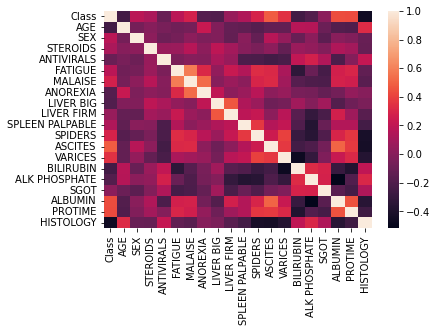

In [274]:
# Plot a correlation matrix for the first dataset using Spearman coefficients
correlationmatrix1 = df1.corr(method='spearman')
ax = sns.heatmap(correlationmatrix1)

In [275]:
# Plot the correlation between all the features and the value to predict
correlationmatrix1['Class']

Class              1.000000
AGE               -0.255525
SEX                0.175876
STEROIDS           0.123830
ANTIVIRALS        -0.108776
FATIGUE            0.181151
MALAISE            0.275595
ANOREXIA          -0.185042
LIVER BIG         -0.194030
LIVER FIRM         0.055978
SPLEEN PALPABLE    0.135643
SPIDERS            0.287839
ASCITES            0.479211
VARICES            0.345785
BILIRUBIN         -0.257384
ALK PHOSPHATE     -0.188705
SGOT               0.013208
ALBUMIN            0.435175
PROTIME            0.427703
HISTOLOGY         -0.456856
Name: Class, dtype: float64

In [276]:
# Plot the most important features
strong_features1 = correlationmatrix1['Class'][(abs(correlationmatrix1['Class'])>0.4)].index.to_numpy()
strong_features1[1:]

array(['ASCITES', 'ALBUMIN', 'PROTIME', 'HISTOLOGY'], dtype=object)

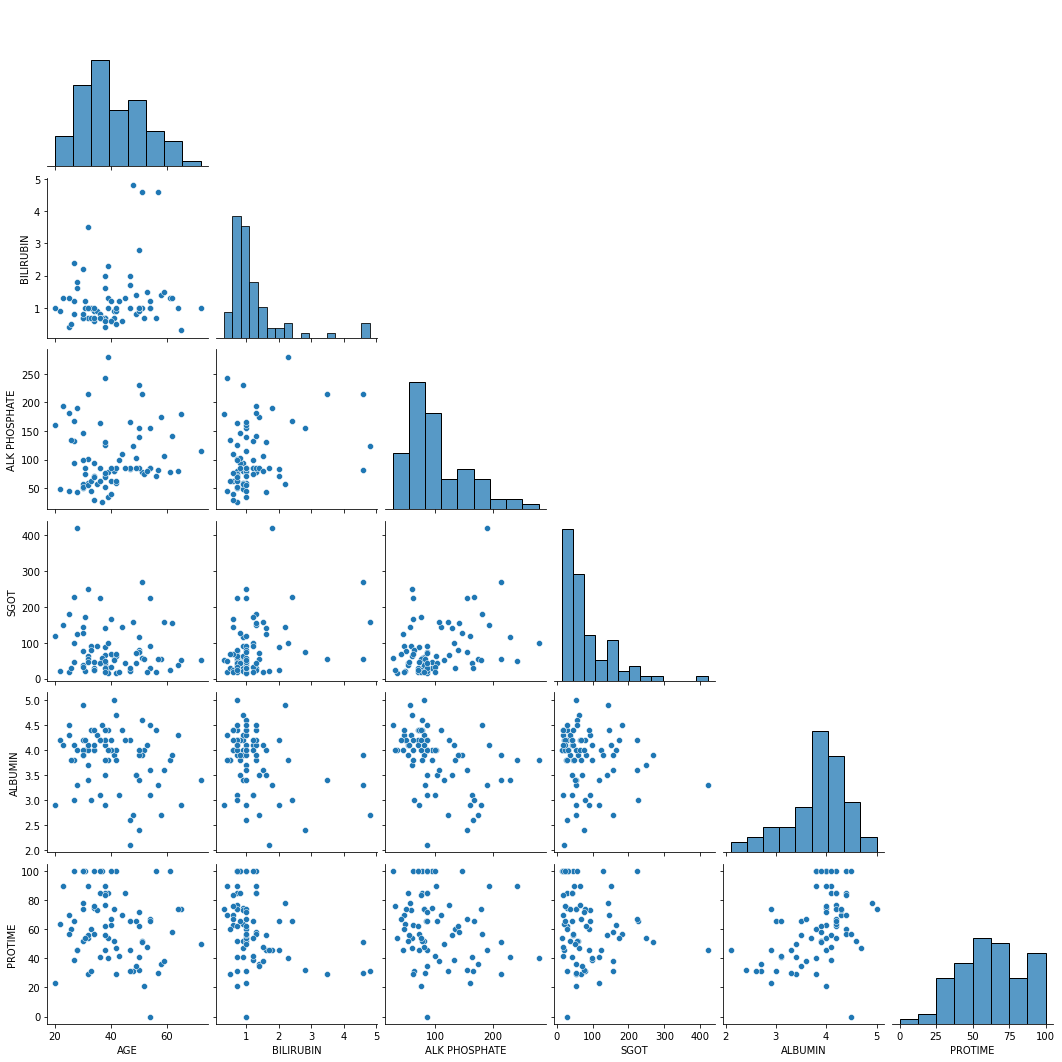

In [277]:
# Create a pairplot using the numerical features to visualize the correlations
list_of_numerical_variables_df1 = ['AGE','BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
sns.pairplot(df1[list_of_numerical_variables_df1], kind="scatter",corner=True)
plt.show()

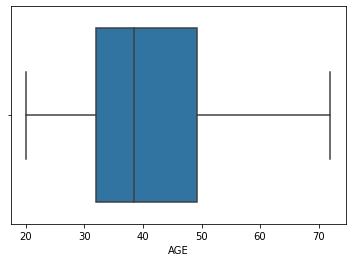

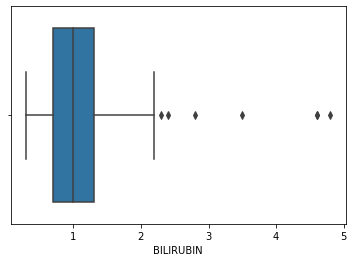

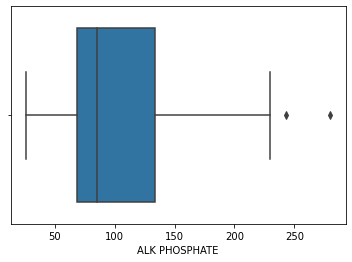

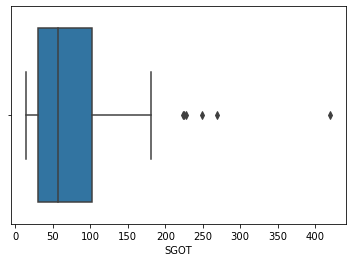

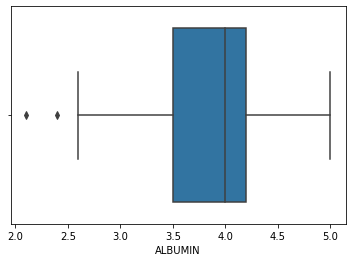

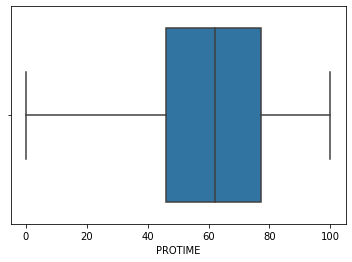

In [278]:
# Create a boxplot for each numerical feature
for feature in list_of_numerical_variables_df1:
    plt.figure()
    sns.boxplot(data=df1[feature], x=df1[feature])
    plt.show()

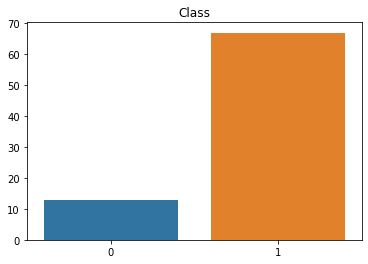

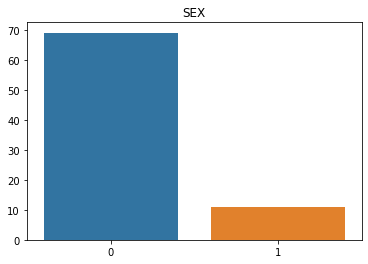

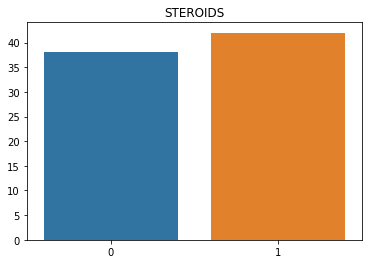

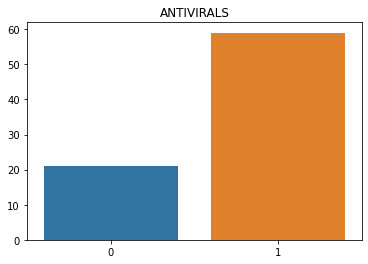

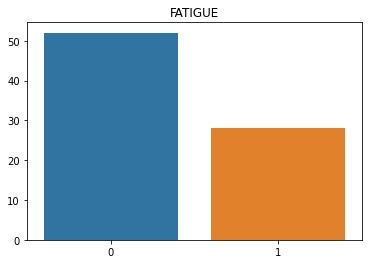

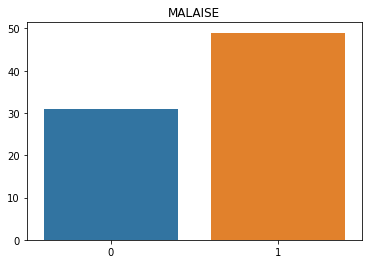

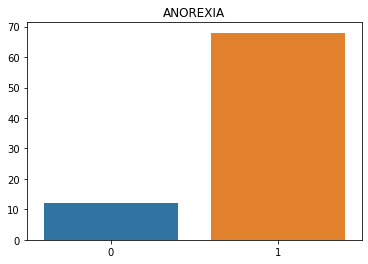

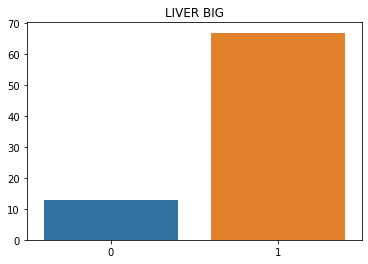

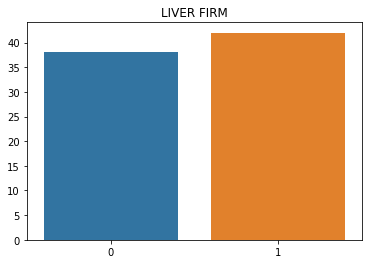

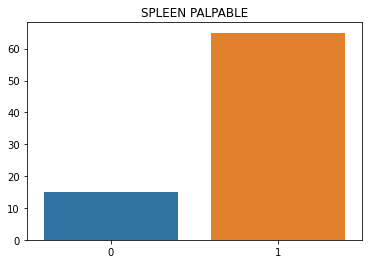

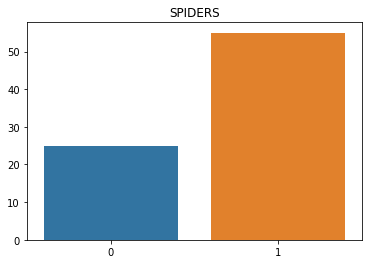

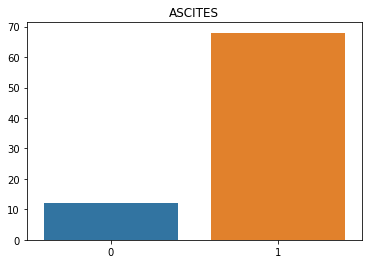

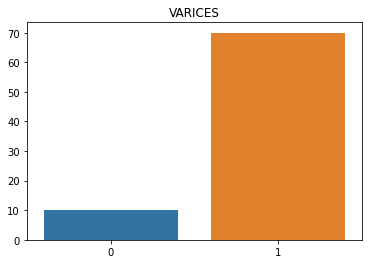

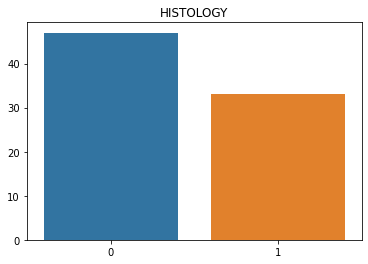

In [279]:
# Create an histogram for each categorical feature
for feature in list_of_categorical_features_df1:
    count_1 = df1[feature].sum()
    count_0 = df1[feature].count() - count_1
    plt.figure()
    sns.barplot(x=[0,1], y=[count_0, count_1])
    plt.title(feature)
    plt.show()

In [280]:
# Apply normalization
df1_normalized =df1
for feature in list_of_numerical_variables_df1:
    df1_normalized[feature] = (df1[feature] - df1[feature].min()) / (df1[feature].max()-df1[feature].min())
df1=df1_normalized
df1

,Class,AGE,SEX,STEROIDS,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,1.0,0.269231,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,0.0
10,1.0,0.365385,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,0.0
11,1.0,0.230769,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,0.0
12,1.0,0.403846,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,0.0
13,1.0,0.192308,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,0.480769,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.222222,0.232283,0.073892,0.724138,0.85,1.0
143,0.0,0.557692,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.244444,0.232283,0.137931,0.482759,0.35,1.0
145,1.0,0.211538,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.200000,0.192913,0.391626,0.724138,0.54,1.0
153,1.0,0.634615,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.266667,0.216535,0.012315,0.689655,0.48,1.0


# Dataset 2

In [281]:
# Read the second dataset (.arff) and create a dataframe
df2 = pd.DataFrame(arff.loadarff("messidor_features.arff")[0])
df2.columns = ['Quality','Retinal Abnormality', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 'Distance', 'Diameter', 'AM/FM', 'DR']
df2

,Quality,Retinal Abnormality,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Distance,Diameter,AM/FM,DR
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,b'0'
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,b'1'


In [282]:
# Count the number of N/A samples by feature column
df2.isna().sum()

Quality                0
Retinal Abnormality    0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
10                     0
11                     0
12                     0
13                     0
14                     0
15                     0
Distance               0
Diameter               0
AM/FM                  0
DR                     0
dtype: int64

In [283]:
# Check the feature types
df2.dtypes
df2=df2.astype(float)
df2.dtypes

Quality                float64
Retinal Abnormality    float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
9                      float64
10                     float64
11                     float64
12                     float64
13                     float64
14                     float64
15                     float64
Distance               float64
Diameter               float64
AM/FM                  float64
DR                     float64
dtype: object

In [284]:
# Check if there is any duplicate samples
list_duplicate = df2.duplicated()
df2[list_duplicate]

,Quality,Retinal Abnormality,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Distance,Diameter,AM/FM,DR
171,1.0,1.0,49.0,48.0,45.0,40.0,37.0,26.0,26.347993,13.666809,2.556415,0.192468,0.000000,0.000000,0.000000,0.000000,0.557765,0.113308,0.0,1.0
627,1.0,1.0,70.0,68.0,64.0,63.0,58.0,38.0,66.751648,32.166708,14.077515,3.378666,0.558174,0.063925,0.007796,0.000000,0.506050,0.101344,0.0,1.0
680,1.0,1.0,66.0,65.0,65.0,64.0,63.0,53.0,11.103445,4.009015,0.397164,0.129273,0.076318,0.052955,0.035823,0.018690,0.543196,0.096565,0.0,1.0
708,1.0,1.0,35.0,33.0,32.0,31.0,31.0,26.0,6.193941,1.625616,0.108061,0.000000,0.000000,0.000000,0.000000,0.000000,0.517101,0.084570,0.0,1.0
782,1.0,1.0,43.0,42.0,42.0,40.0,39.0,34.0,21.612661,9.669272,0.903438,0.274757,0.128841,0.082272,0.066749,0.058987,0.541183,0.099347,0.0,1.0


In [285]:
# Delete the duplicated samples
df2 = df2.drop_duplicates()
sum(df2.duplicated())

0

In [286]:
# Use 0/1 instead of b'0'/b'1'
df2['DR'] = df2['DR'].replace([str(b'0'),str(b'1')],[0,1])
df2

,Quality,Retinal Abnormality,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Distance,Diameter,AM/FM,DR
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,34.0,34.0,34.0,33.0,31.0,24.0,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0.0,0.0
1147,1.0,1.0,49.0,49.0,49.0,49.0,45.0,37.0,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0.0,0.0
1148,1.0,0.0,49.0,48.0,48.0,45.0,43.0,33.0,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0.0,0.0
1149,1.0,1.0,39.0,36.0,29.0,23.0,13.0,7.0,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1.0,1.0


In [287]:
# Plot the basic statistics for each feature
df2.describe()

,Quality,Retinal Abnormality,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Distance,Diameter,AM/FM,DR
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,0.996510,0.917976,38.366492,36.847295,35.077661,32.230366,28.673647,21.089005,64.261137,23.135397,8.726845,1.841033,0.562519,0.213042,0.085952,0.037320,0.523169,0.108472,0.337696,0.528796
std,0.059002,0.274522,25.644361,24.123378,22.819131,21.117992,19.502277,15.090728,58.542557,21.626029,11.582606,3.930244,2.489344,1.059367,0.399561,0.179337,0.028082,0.017963,0.473131,0.499388
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.336230,7.944090,1.269613,0.081552,0.000000,0.000000,0.000000,0.000000,0.502692,0.095786,0.000000,0.000000
50%,1.000000,1.000000,35.000000,34.000000,32.000000,29.000000,25.000000,18.000000,44.391984,17.060762,4.445557,0.487401,0.022149,0.001551,0.000000,0.000000,0.523277,0.106640,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.915325,31.310584,11.775557,1.925969,0.192363,0.037403,0.004809,0.003850,0.543678,0.119750,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


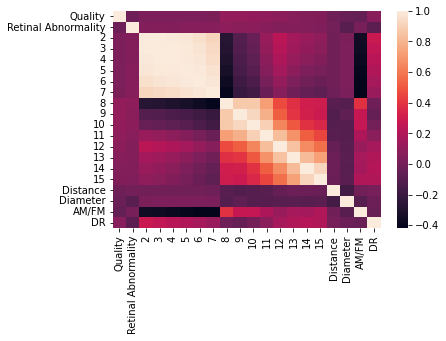

In [288]:
# Plot a correlation matrix for the second dataset using Spearman coefficients
correlationmatrix2 = df2.corr(method='spearman')
ax = sns.heatmap(correlationmatrix2)

In [289]:
# Plot the correlation between all the features and the value to predict
correlationmatrix2['DR']

Quality                0.062696
Retinal Abnormality   -0.078315
2                      0.279876
3                      0.254256
4                      0.225492
5                      0.192718
6                      0.162133
7                      0.127867
8                     -0.016967
9                     -0.048138
10                     0.000024
11                     0.068737
12                     0.166460
13                     0.196355
14                     0.208803
15                     0.191823
Distance               0.007385
Diameter              -0.030759
AM/FM                 -0.039344
DR                     1.000000
Name: DR, dtype: float64

In [290]:
# Plot the most important features
strong_features2 = correlationmatrix2['DR'][(abs(correlationmatrix2['DR'])>0.2)].index.to_numpy()
strong_features2[:-1]

array(['2', '3', '4', '14'], dtype=object)

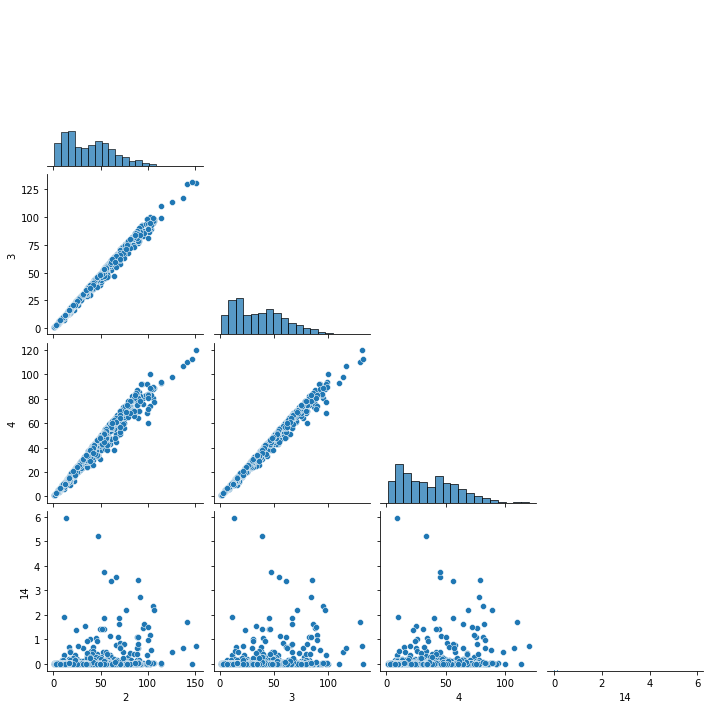

In [291]:
# Create a pairplot using the numerical features to visualize the correlations
list_of_numerical_variables_df2 = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', 'Distance', 'Diameter']
sns.pairplot(df2[strong_features2[:-1]], kind="scatter", corner=True)
plt.show()

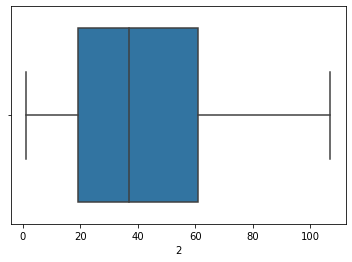

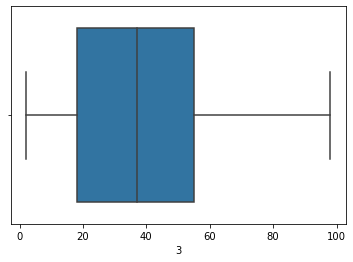

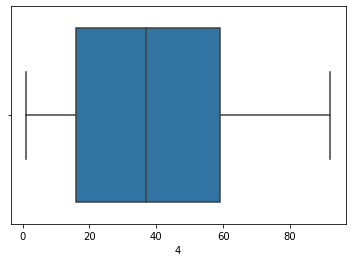

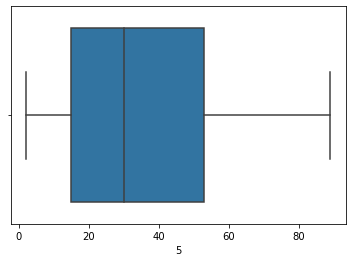

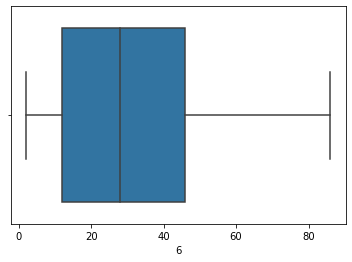

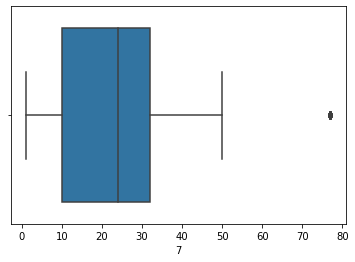

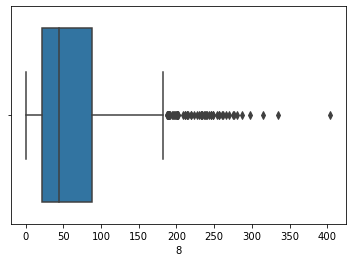

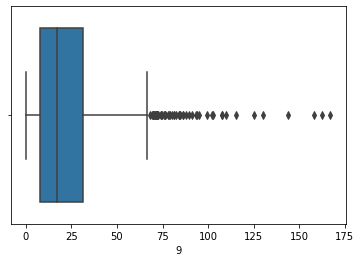

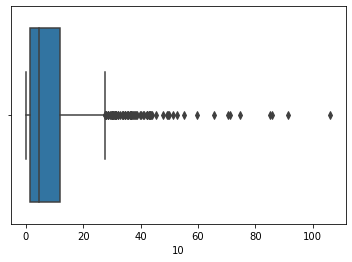

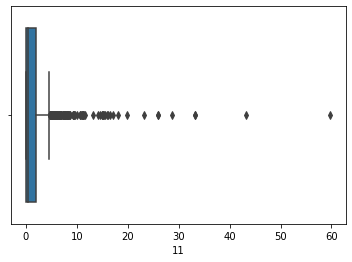

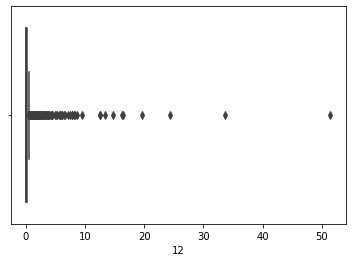

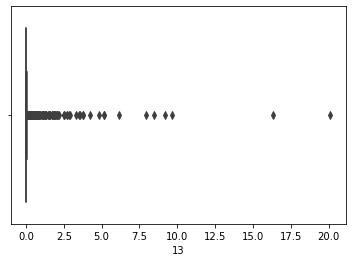

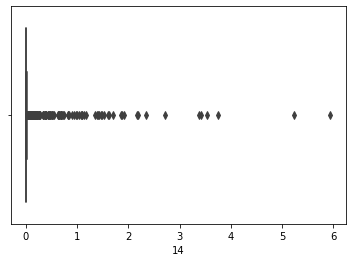

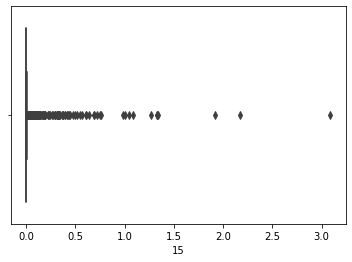

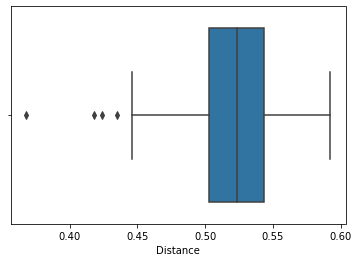

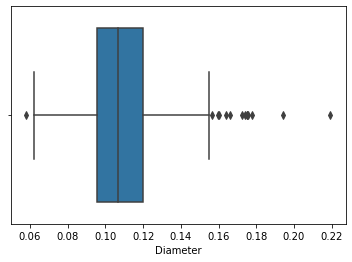

In [292]:
# Create a boxplot for each numerical feature
for feature in list_of_numerical_variables_df2:
    plt.figure()
    sns.boxplot(data=df2[feature], x=df2[feature])
    plt.show()

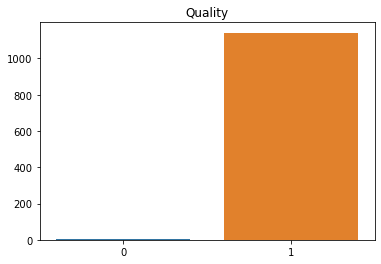

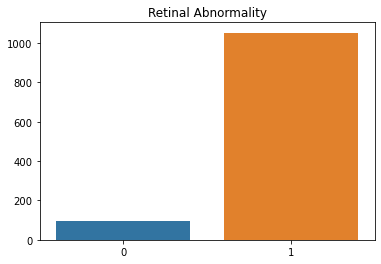

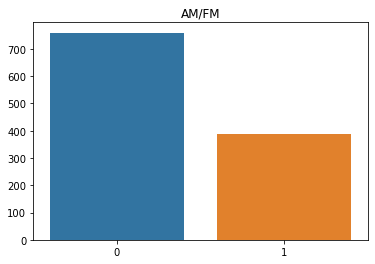

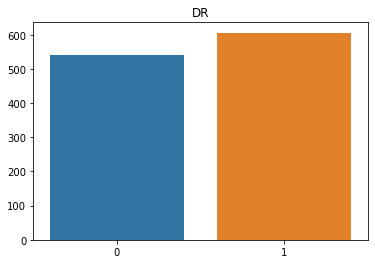

In [293]:
# Create an histogram for each categorical feature
list_of_categorical_features_df2 = ['Quality','Retinal Abnormality', 'AM/FM', 'DR']
for feature in list_of_categorical_features_df2:
    count_1 = df2[feature].sum()
    count_0 = df2[feature].count() - count_1
    plt.figure()
    sns.barplot(x=[0,1], y=[count_0, count_1])
    plt.title(feature)
    plt.show()

In [294]:
# Apply normalization
df2_normalized =df2
for feature in list_of_numerical_variables_df2:
    df2_normalized[feature] = (df2[feature] - df2[feature].min()) / (df2[feature].max()-df2[feature].min())
df2=df2_normalized
df2

,Quality,Retinal Abnormality,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Distance,Diameter,AM/FM,DR
0,1.0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0,0.0
1,1.0,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0,0.0
2,1.0,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0,1.0
3,1.0,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0,0.0
4,1.0,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0,0.0
1147,1.0,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0,0.0
1148,1.0,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0,0.0
1149,1.0,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0,1.0


# Useful functions

In [295]:
# Plot the most important evaluation metrics for classification
def metrics(y_test, y_pred):
    TP = np.sum(np.logical_and([y_test == 1], [y_pred==1]))
    TN = np.sum(np.logical_and([y_test == 0], [y_pred==0]))
    FP = np.sum(np.logical_and([y_test == 0], [y_pred==1]))
    FN = np.sum(np.logical_and([y_test == 1], [y_pred==0]))
    if TP ==0 :
        Recall=0
        F1=0
        Precision=0
    else:
        Recall = TP /(TP + FN)
        Precision = TP /(TP + FP)
        F1 = 2*(Recall*Precision)/(Recall+Precision)
    print('Accuracy:',str(round((np.sum(y_test == y_pred)/y_test.size)*100,2))+'%')
    print('Confusion Matrix :', [[TP,FP],[FN, TN]] )
    print('Recall :', round(Recall,2))
    print('Precision :', round(Precision,2))
    print('F1 Score :', round(F1,2))

In [296]:
# Compute the F1-score
def F1(y_test, y_pred):
    TP = np.sum(np.logical_and([y_test == 1], [y_pred==1]))
    TN = np.sum(np.logical_and([y_test == 0], [y_pred==0]))
    FP = np.sum(np.logical_and([y_test == 0], [y_pred==1]))
    FN = np.sum(np.logical_and([y_test == 1], [y_pred==0]))
    if TP ==0 :
        F1=0
    else:
        Recall = TP /(TP + FN)
        Precision = TP /(TP + FP)
        F1 = 2*(Recall*Precision)/(Recall+Precision)
    return F1

In [297]:
# Plot the precision recall curve
def PR_curve(y_test, y_prob):
    recall_list=[]
    precision_list=[]
    threshold_list=np.linspace(0,1,1000)
    for threshold in threshold_list:
        y_pred = y_prob[:,1] > threshold
        if threshold == 1:
            Precision = 1
            Recall =0
        else:
            TP = np.sum(np.logical_and([y_test == 1], [y_pred==1]))
            TN = np.sum(np.logical_and([y_test == 0], [y_pred==0]))
            FP = np.sum(np.logical_and([y_test == 0], [y_pred==1]))
            FN = np.sum(np.logical_and([y_test == 1], [y_pred==0]))
            Recall = TP /(TP + FN)
            Precision = TP /(TP + FP)
        recall_list.append(Recall)
        precision_list.append(Precision)
    return recall_list,precision_list

In [298]:
# Compute the AUC associated to precision recall curve
def PR_AUC(y_test, y_pred):
    recall_list, precision_list = PR_curve(y_test, y_pred)
    list_index=np.argsort(recall_list)
    X=np.sort(recall_list)
    Y=[precision_list[i] for i in list_index]
    area=0
    for i in range(len(X)-1):
        area=area+(X[i+1]-X[i])*(Y[i]+Y[i+1])/2
    print('PR AUC: ', round(area,4))

# Weighted KNN

In [299]:
# Create two distance functions
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

In [300]:
# Create a weighted KNN model class
class KNN:
    
    def __init__(self, K, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.C = len(np.unique(y).tolist())
        return self
    
    def predict(self, x_test):
        list_of_category = np.unique(self.y).tolist()
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            res=[np.argwhere(self.y[knns[i,:]]==c) for c in list_of_category]
            y_prob[i,:] = [(sum(np.reciprocal([distances[i][j[0]] for j in knns[i,:][res[k]]])))*(sum(np.reciprocal([distances[i][j] for j in knns[i,:]])))**(-1) for k in range (len(res))]
        return y_prob, knns

# K-Fold KNN

In [301]:
# Perform a 5-fold validation to find the best K value
def KFiveFold_KNN(x_train, y_train, max_k, dist_fn):
    fold_1_x, fold_1_y = x_train.iloc[:math.ceil(len(x_train)/5)], y_train.iloc[:math.ceil(len(y_train)/5)]
    fold_2_x, fold_2_y = x_train.iloc[math.ceil(len(x_train)/5):2*math.ceil(len(x_train)/5)], y_train.iloc[math.ceil(len(y_train)/5):2*math.ceil(len(y_train)/5)]
    fold_3_x, fold_3_y = x_train.iloc[2*math.ceil(len(x_train)/5):3*math.ceil(len(x_train)/5)], y_train.iloc[2*math.ceil(len(y_train)/5):3*math.ceil(len(y_train)/5)]
    fold_4_x, fold_4_y = x_train.iloc[3*math.ceil(len(x_train)/5):4*math.ceil(len(x_train)/5)], y_train.iloc[3*math.ceil(len(y_train)/5):4*math.ceil(len(y_train)/5)]
    fold_5_x, fold_5_y = x_train.iloc[4*math.ceil(len(x_train)/5):], y_train.iloc[4*math.ceil(len(y_train)/5):]

    fold_x=[fold_1_x, fold_2_x, fold_3_x, fold_4_x, fold_5_x]
    fold_y=[fold_1_y, fold_2_y, fold_3_y, fold_4_y, fold_5_y]

    train1_x = pd.concat([fold_2_x, fold_3_x, fold_4_x, fold_5_x])
    train2_x = pd.concat([fold_3_x, fold_4_x, fold_5_x, fold_1_x])
    train3_x = pd.concat([fold_4_x, fold_5_x, fold_1_x, fold_2_x])
    train4_x = pd.concat([fold_5_x, fold_1_x, fold_2_x, fold_3_x])
    train5_x = pd.concat([fold_1_x, fold_2_x, fold_3_x, fold_4_x])

    train1_y = pd.concat([fold_2_y, fold_3_y, fold_4_y, fold_5_y])
    train2_y = pd.concat([fold_3_y, fold_4_y, fold_5_y, fold_1_y])
    train3_y = pd.concat([fold_4_y, fold_5_y, fold_1_y, fold_2_y])
    train4_y = pd.concat([fold_5_y, fold_1_y, fold_2_y, fold_3_y])
    train5_y = pd.concat([fold_1_y, fold_2_y, fold_3_y, fold_4_y])

    train_list_x =[]
    train_list_x.append(train1_x)
    train_list_x.append(train2_x)
    train_list_x.append(train3_x)
    train_list_x.append(train4_x)
    train_list_x.append(train5_x)

    train_list_y =[]
    train_list_y.append(train1_y)
    train_list_y.append(train2_y)
    train_list_y.append(train3_y)
    train_list_y.append(train4_y)
    train_list_y.append(train5_y)

    F1_validation= []
    F1_each_run =[]

    for k in range (2,max_k+1):
        for i, j in itertools.zip_longest(range(0, 5), reversed(range(0,5))):
            model = KNN(K=k, dist_fn=dist_fn)
            y_prob, knns = model.fit(train_list_x[i].to_numpy(), train_list_y[i].to_numpy()).predict(fold_x[j].to_numpy())
            y_pred = y_prob[:,1] > 0.5
            F1_each_run.append(F1(fold_y[j], y_pred))
            if len(F1_each_run)==5:
                F1_validation.append(F1_each_run)
                F1_each_run=[]
            else:
                continue

    each_avg = list(map(np.mean,F1_validation))
    best_k = np.argmax(each_avg)+2
    print('The best K value is : ', best_k)
    return each_avg

In [302]:
# Perform a 3-fold validation to find the best K value
def KThreeFold_KNN(x_train, y_train, max_k, dist_fn):
    fold_1_x, fold_1_y = x_train.iloc[:math.ceil(len(x_train)/3)], y_train.iloc[:math.ceil(len(y_train)/3)]
    fold_2_x, fold_2_y = x_train.iloc[math.ceil(len(x_train)/3):2*math.ceil(len(x_train)/3)], y_train.iloc[math.ceil(len(y_train)/3):2*math.ceil(len(y_train)/3)]
    fold_3_x, fold_3_y = x_train.iloc[2*math.ceil(len(x_train)/3):], y_train.iloc[2*math.ceil(len(y_train)/3):]


    fold_x=[fold_1_x, fold_2_x, fold_3_x]
    fold_y=[fold_1_y, fold_2_y, fold_3_y]

    train1_x = pd.concat([fold_1_x, fold_2_x])
    train2_x = pd.concat([fold_1_x, fold_3_x])
    train3_x = pd.concat([fold_2_x, fold_3_x])

    train1_y = pd.concat([fold_1_y, fold_2_y])
    train2_y = pd.concat([fold_1_y, fold_3_y])
    train3_y = pd.concat([fold_2_y, fold_3_y])


    train_list_x =[]
    train_list_x.append(train1_x)
    train_list_x.append(train2_x)
    train_list_x.append(train3_x)


    train_list_y =[]
    train_list_y.append(train1_y)
    train_list_y.append(train2_y)
    train_list_y.append(train3_y)


    F1_validation= []
    F1_each_run =[]

    for k in range (2,max_k+1):
        for i, j in itertools.zip_longest(range(0, 3), reversed(range(0, 3))):
            model = KNN(K=k, dist_fn=dist_fn)
            y_prob, knns = model.fit(train_list_x[i].to_numpy(), train_list_y[i].to_numpy()).predict(fold_x[j].to_numpy())
            y_pred = y_prob[:,1] > 0.5
            F1_each_run.append(F1(fold_y[j], y_pred))
            if len(F1_each_run)==3:
                F1_validation.append(F1_each_run)
                F1_each_run=[]
            else:
                continue

    each_avg = list(map(np.mean,F1_validation))
    best_k = np.argmax(each_avg)+2
    print('The best K value is : ', best_k)
    return each_avg

# Test the KNN on the dataset 1

In [303]:
# Create the input and output dataframes
x1, y1 = df1.drop(columns=['Class']), df1['Class']
x1 = x1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

In [304]:
# Fix the random seed to ensure reproductibility and create a random index permutation
np.random.seed(123)
rand_index1 = np.random.permutation(x1.shape[0])

In [305]:
# Define the split percentage and create the test and train dataframes
train_pct1 = 0.75
cut_index_1 = int(x1.shape[0]*train_pct1)-1
x1_train, y1_train = x1.iloc[rand_index1[:cut_index_1]], y1.iloc[rand_index1[:cut_index_1]]
x1_test, y1_test = x1.iloc[rand_index1[cut_index_1:]], y1.iloc[rand_index1[cut_index_1:]]

For the Euclidean distance : 
The best K value is :  7
For the Manhattan distance : 
The best K value is :  7


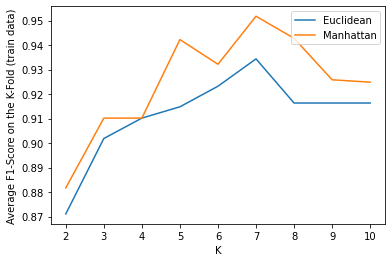

In [306]:
# Perform a 3-fold validation to find the best K value
max_k = 10
print('For the Euclidean distance : ')
f1_avg1_euclidean = KThreeFold_KNN(x1_train, y1_train, max_k, dist_fn=euclidean)
print('For the Manhattan distance : ')
f1_avg1_manhattan = KThreeFold_KNN(x1_train, y1_train, max_k, dist_fn=manhattan)
plt.plot([k for k in range(2, max_k +1)],f1_avg1_euclidean, label='Euclidean')
plt.plot([k for k in range(2, max_k +1)],f1_avg1_manhattan, label='Manhattan')
plt.xlabel('K')
plt.ylabel('Average F1-Score on the K-Fold (train data)')
plt.legend(loc="upper right")

In [307]:
# Perform the test prediction using the best K
myK1 = 7
model1 = KNN(K=myK1, dist_fn = manhattan)
y1_prob, knns = model1.fit(x1_train.to_numpy(), y1_train.to_numpy()).predict(x1_test.to_numpy())
y1_pred = y1_prob[:,1] > 0.5

In [308]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y1_test, y1_pred)

Accuracy: 95.24%
Confusion Matrix : [[16, 1], [0, 4]]
Recall : 1.0
Precision : 0.94
F1 Score : 0.97


Text(0, 0.5, 'Precision')

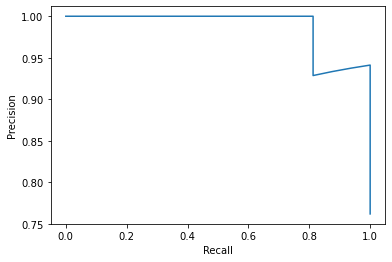

In [309]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y1_test, y1_prob)
plt.plot(recall_list, precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [310]:
# Compute the AUC associated to precision recall curve
PR_AUC(y1_test, y1_prob)

PR AUC:  0.9901


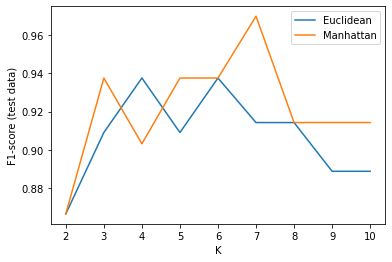

In [311]:
# Plot the accuracy for different K values and for the two distance functions
f1_1_euclidean = []
f1_1_manhattan = []
max_k = 10

for i in range(2, max_k + 1):
    model_euclidean = KNN(K=i,dist_fn=euclidean)
    y1_prob_euclidean, knns_euclidean = model_euclidean.fit(x1_train.to_numpy(), y1_train.to_numpy()).predict(x1_test.to_numpy())
    y1_pred_euclidean = y1_prob_euclidean[:,1] > 0.5
    f1_1_euclidean.append(F1(y1_test, y1_pred_euclidean))

    model_manhattan = KNN(K=i,dist_fn=manhattan)
    y1_prob_manhattan, knns_manhattan = model_manhattan.fit(x1_train.to_numpy(), y1_train.to_numpy()).predict(x1_test.to_numpy())
    y1_pred_manhattan = y1_prob_manhattan[:,1] > 0.5
    f1_1_manhattan.append(F1(y1_test, y1_pred_manhattan))
    
plt.plot([k for k in range(2, max_k+1)],f1_1_euclidean, label='Euclidean')
plt.plot([k for k in range(2, max_k+1)],f1_1_manhattan, label='Manhattan')
plt.xlabel('K')
plt.ylabel('F1-score (test data)')
plt.legend(loc="upper right")

# Test the KNN on the dataset 2

In [312]:
# Create the input and output dataframes
x2, y2 = df2.drop(columns=['DR']), df2['DR']
x2 = x2.reset_index(drop=True)
y2 = y2.reset_index(drop=True)

In [313]:
# Fix the random seed to ensure reproductibility and create a random index permutation
np.random.seed(42)
rand_index2 = np.random.permutation(x2.shape[0])

In [314]:
# Define the split percentage and create the test and train dataframes
train_pct2 = 0.75
cut_index_2 = int(x2.shape[0]*train_pct2)-1
x2_train, y2_train = x2.iloc[rand_index2[:cut_index_2]], y2.iloc[rand_index2[:cut_index_2]]
x2_test, y2_test = x2.iloc[rand_index2[cut_index_2:]], y2.iloc[rand_index2[cut_index_2:]]

For the Euclidean distance : 
The best K value is :  9
For the Manhattan distance : 
The best K value is :  9


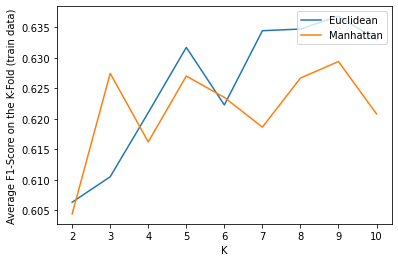

In [315]:
# Perform a 3-fold validation to find the best K value
max_k = 10
print('For the Euclidean distance : ')
F1_avg2_euclidean = KThreeFold_KNN(x2_train, y2_train, max_k, dist_fn=euclidean)
print('For the Manhattan distance : ')
F1_avg2_manhattan = KThreeFold_KNN(x2_train, y2_train, max_k, dist_fn=manhattan)
plt.plot([k for k in range(2, max_k +1)],F1_avg2_euclidean, label='Euclidean')
plt.plot([k for k in range(2, max_k +1)],F1_avg2_manhattan, label='Manhattan')
plt.xlabel('K')
plt.ylabel('Average F1-Score on the K-Fold (train data)')
plt.legend(loc="upper right")

In [316]:
# Perform the test prediction using the best K
myK2 = 9
model2 = KNN(K=myK2, dist_fn=manhattan)
y2_prob, knns = model2.fit(x2_train.to_numpy(), y2_train.to_numpy()).predict(x2_test.to_numpy())
y2_pred = y2_prob[:,1] > 0.5

In [317]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y2_test, y2_pred)

Accuracy: 62.85%
Confusion Matrix : [[93, 49], [58, 88]]
Recall : 0.62
Precision : 0.65
F1 Score : 0.63


Text(0, 0.5, 'Precision')

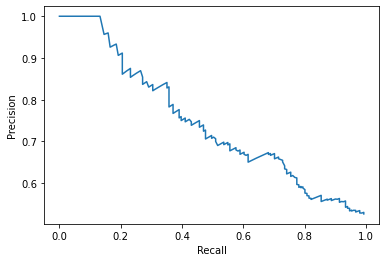

In [318]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y2_test, y2_prob)
plt.plot(recall_list, precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [319]:
# Compute the AUC associated to precision recall curve
PR_AUC(y2_test, y2_prob)

PR AUC:  0.7412


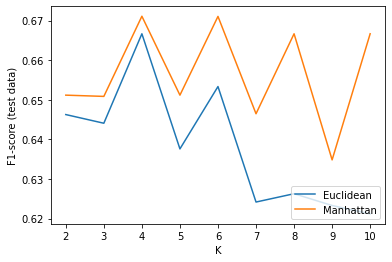

In [320]:
# Plot the accuracy for different K values and for the two distance functions
f1_2_euclidean=[]
f1_2_manhattan=[]
max_k=10

for i in range(2,max_k+1):
    model_euclidean = KNN(K=i,dist_fn=euclidean)
    y2_prob_euclidean, knns_euclidean = model_euclidean.fit(x2_train.to_numpy(), y2_train.to_numpy()).predict(x2_test.to_numpy())
    y2_pred_euclidean = y2_prob_euclidean[:,1] > 0.5
    f1_2_euclidean.append(F1(y2_test, y2_pred_euclidean))

    model_manhattan = KNN(K=i,dist_fn=manhattan)
    y2_prob_manhattan, knns_manhattan = model_manhattan.fit(x2_train.to_numpy(), y2_train.to_numpy()).predict(x2_test.to_numpy())
    y2_pred_manhattan = y2_prob_manhattan[:,1] > 0.5
    f1_2_manhattan.append(F1(y2_test, y2_pred_manhattan))

plt.plot([k for k in range(2, max_k+1)],f1_2_euclidean, label='Euclidean')
plt.plot([k for k in range(2, max_k+1)],f1_2_manhattan, label='Manhattan')
plt.xlabel('K')
plt.ylabel('F1-score (test data)')
plt.legend(loc="lower right")

# Decision Tree

In [321]:
# Compute the gini index
def gini_index(list_of_index, y, class_num):
    class_probs = np.bincount(y.loc[list_of_index], minlength = class_num) / len(y.loc[list_of_index])
    return 1 - np.sum(np.square(class_probs))            

In [322]:
# Compute the entropy
def entropy(list_of_index, y, class_num):
    class_probs = np.bincount(y.loc[list_of_index], minlength = class_num) / len(y.loc[list_of_index])
    class_probs = class_probs[class_probs > 0]              
    return -np.sum(class_probs * np.log2(class_probs))      

In [323]:
# Return the class probabilities for a set a sample index
def probability(list_of_index, y, class_num):
    class_probs = np.bincount(y.loc[list_of_index], minlength = class_num) / len(y.loc[list_of_index])
    return class_probs

In [324]:
# Give the best split to do from a specific node
def greedy_split(parent_node, feature_list, x, y, class_num, cost_fn):
    lowest_cost = np.inf
    best_threshold = None
    best_feature = None
    left_child_node = {'parent': parent_node['index'], 'children': [], 'sample_index':[], 'feature':None, "threshold": None, 'depth': parent_node['depth']+1, "probability":[], "condition": False}
    right_child_node = {'parent': parent_node['index'], 'children': [], 'sample_index':[], 'feature':None, "threshold": None, 'depth': parent_node['depth']+1, "probability":[], "condition": True}

    for i in feature_list:
        feature_column = x[i].to_numpy()

        res = sorted(feature_column)
        res = np.unique(feature_column)
        threshold_result = []

        for j in range(len(res)-1):
            threshold = (res[j]+res[j+1])/2
            threshold_result.append(threshold)

        for k in threshold_result:
            left_node_index = x.loc[feature_column <= k].index
            right_node_index = x.loc[feature_column > k].index

            left_node_cost = cost_fn(left_node_index, y.loc[left_node_index], class_num)
            right_node_cost = cost_fn(right_node_index, y.loc[right_node_index], class_num)

            left_node_proba = probability(left_node_index, y.loc[left_node_index],class_num)
            right_node_proba = probability(right_node_index, y.loc[right_node_index], class_num)
            left_weight = len(left_node_index) / (len(left_node_index) + len(right_node_index))
            right_weight = len(right_node_index) / (len(left_node_index) + len(right_node_index))
            total_cost = left_weight * left_node_cost + right_weight * right_node_cost

            if total_cost < lowest_cost:
                lowest_cost = total_cost
                best_feature = i
                best_threshold = k
                number_of_nodes=len(tree)
                left_child_node = {'index':number_of_nodes, 'parent': parent_node['index'], 'children': [], 'sample_index':left_node_index, 'feature':None, "threshold": None, 'depth': parent_node['depth']+1, "probability":left_node_proba, "condition": False}
                right_child_node = {'index':number_of_nodes+1, 'parent': parent_node['index'], 'children': [], 'sample_index':right_node_index, 'feature':None, "threshold": None, 'depth': parent_node['depth']+1, "probability":right_node_proba, "condition": True}

    return left_child_node, right_child_node, best_feature, best_threshold 

In [325]:
# Create the tree by recursivity
def decision_tree(node, x, y, max_depth, min_sample, feature_list, class_num, cost_fn):

    sample_count = len(x.index)

    if node ['depth'] < max_depth and sample_count > min_sample and (1 not in node['probability']):
        left_node, right_node, best_feature, best_threshold = greedy_split(node, feature_list, x, y, class_num, cost_fn)
        node['children'] = [left_node['index'], right_node['index']] 
        node['feature'] = best_feature
        node['threshold'] = best_threshold
        if len(left_node['sample_index'])!=0 and len(right_node['sample_index'])!=0:
            tree.append(left_node)
            tree.append(right_node)
            decision_tree(left_node, x.loc[left_node['sample_index']], y.loc[left_node['sample_index']], max_depth, min_sample, feature_list, class_num, cost_fn)
            decision_tree(right_node, x.loc[right_node['sample_index']], y.loc[right_node['sample_index']], max_depth, min_sample, feature_list, class_num, cost_fn)
    return 

In [326]:
# Create a decision tree model class
class DecisionTree:
    def __init__(self, max_depth=3, cost_fn=gini_index, min_sample=2):
        self.max_depth = max_depth
        self.cost_fn = cost_fn
        self.min_sample = min_sample
        
    def fit(self, x, y):
        pass
    
    def predict(self, tree, x):
        pass

In [327]:
# Train the model by creating the tree
def fit (self, x, y):
    class_num=len(np.unique(y))
    global tree
    tree=[]
    feature_list=x.columns.to_numpy()
    root_node = {'index':0 , 'parent': None, 'children':[], 'sample_index': x.index, 'feature': None, "threshold": None, "depth": 0, "probability": probability(x.index, y, class_num), "condition": None}
    tree.append(root_node)
    decision_tree(root_node, x, y, self.max_depth, self.min_sample, feature_list, class_num, self.cost_fn)
    return tree, root_node

DecisionTree.fit = fit

In [328]:
# Predict the test value using a trained tree
def predict (self, tree, x):
    y_predict=[]
    sample_to_predict = x.to_numpy()
    for i,each in enumerate(sample_to_predict):
        current_node = tree[0]
        while len(current_node["children"]) != 0:
            feature = current_node["feature"]
            threshold = current_node["threshold"]

            if x[feature].iloc[i] > threshold:
                current_node = tree[current_node["children"][1]]
            else:
                current_node = tree[current_node["children"][0]]

        y_predict.append(current_node['probability'])
    return y_predict

DecisionTree.predict = predict

# K-Fold Decision Tree

In [329]:
# Perform a 5-fold validation to find the best depth value
def KFiveFold_DT(x_train, y_train, max_depth, cost_fn):
    fold_1_x, fold_1_y = x1_train.iloc[:math.ceil(len(x1_train)/5)], y1_train.iloc[:math.ceil(len(y1_train)/5)]
    fold_2_x, fold_2_y = x1_train.iloc[math.ceil(len(x1_train)/5):2*math.ceil(len(x1_train)/5)], y1_train.iloc[math.ceil(len(y1_train)/5):2*math.ceil(len(y1_train)/5)]
    fold_3_x, fold_3_y = x1_train.iloc[2*math.ceil(len(x1_train)/5):3*math.ceil(len(x1_train)/5)], y1_train.iloc[2*math.ceil(len(y1_train)/5):3*math.ceil(len(y1_train)/5)]
    fold_4_x, fold_4_y = x1_train.iloc[3*math.ceil(len(x1_train)/5):4*math.ceil(len(x1_train)/5)], y1_train.iloc[3*math.ceil(len(y1_train)/5):4*math.ceil(len(y1_train)/5)]
    fold_5_x, fold_5_y = x1_train.iloc[4*math.ceil(len(x1_train)/5):], y1_train.iloc[4*math.ceil(len(y1_train)/5):]

    fold_x=[fold_1_x, fold_2_x, fold_3_x, fold_4_x, fold_5_x]
    fold_y=[fold_1_y, fold_2_y, fold_3_y, fold_4_y, fold_5_y]

    train1_x = pd.concat([fold_2_x, fold_3_x, fold_4_x, fold_5_x])
    train2_x = pd.concat([fold_3_x, fold_4_x, fold_5_x, fold_1_x])
    train3_x = pd.concat([fold_4_x, fold_5_x, fold_1_x, fold_2_x])
    train4_x = pd.concat([fold_5_x, fold_1_x, fold_2_x, fold_3_x])
    train5_x = pd.concat([fold_1_x, fold_2_x, fold_3_x, fold_4_x])

    train1_y = pd.concat([fold_2_y, fold_3_y, fold_4_y, fold_5_y])
    train2_y = pd.concat([fold_3_y, fold_4_y, fold_5_y, fold_1_y])
    train3_y = pd.concat([fold_4_y, fold_5_y, fold_1_y, fold_2_y])
    train4_y = pd.concat([fold_5_y, fold_1_y, fold_2_y, fold_3_y])
    train5_y = pd.concat([fold_1_y, fold_2_y, fold_3_y, fold_4_y])

    train_list_x =[]
    train_list_x.append(train1_x)
    train_list_x.append(train2_x)
    train_list_x.append(train3_x)
    train_list_x.append(train4_x)
    train_list_x.append(train5_x)

    train_list_y =[]
    train_list_y.append(train1_y)
    train_list_y.append(train2_y)
    train_list_y.append(train3_y)
    train_list_y.append(train4_y)
    train_list_y.append(train5_y)
    
    F1_validation= []
    F1_each_run=[]
    
    for depth in range (2, max_depth+1):
        for i, j in itertools.zip_longest(range(0, 5), reversed(range(0,5))):
            dt=DecisionTree(depth, cost_fn = cost_fn, min_sample=2)
            y_prob = np.array([k for k in dt.predict (dt.fit(train_list_x[i], train_list_y[i])[0], fold_x[j])])
            y_pred = y_prob[:,1] > 0.5
            F1_each_run.append(F1(fold_y[j], y_pred))
            if len(F1_each_run)==5:
                F1_validation.append(F1_each_run)
                F1_each_run=[]
            else:
                continue


    each_avg = list(map(np.mean,F1_validation))
    best_depth = np.argmax(each_avg)+2
    print('The best depth value is : ', best_depth)
    return each_avg

# Test the DT on the dataset 1

For the gini index cost function :
The best depth value is :  3
For the entropy cost function :
The best depth value is :  3


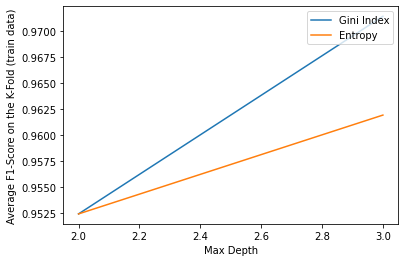

In [330]:
# Perform a 5-fold validation to find the best depth value
max_depth = 3
print('For the gini index cost function :')
f1_avg1_gini = KFiveFold_DT(x1_train, y1_train, max_depth, cost_fn=gini_index)
print('For the entropy cost function :')
f1_avg1_entropy = KFiveFold_DT(x1_train, y1_train, max_depth, cost_fn=entropy)
plt.plot([d for d in range(2, max_depth +1)],f1_avg1_gini, label='Gini Index')
plt.plot([d for d in range(2, max_depth +1)],f1_avg1_entropy, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Average F1-Score on the K-Fold (train data)')
plt.legend(loc="upper right")

In [331]:
# Perform the test prediction using the best depth
dt1=DecisionTree(max_depth=3, cost_fn=entropy, min_sample=2)
tree1 = dt1.fit (x1_train, y1_train)[0]
y1_prob = np.array([i for i in dt1.predict (tree1, x1_test)])
y1_pred = y1_prob[:,1] > 0.5

In [332]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y1_test, y1_pred)

Accuracy: 71.43%
Confusion Matrix : [[13, 3], [3, 2]]
Recall : 0.81
Precision : 0.81
F1 Score : 0.81


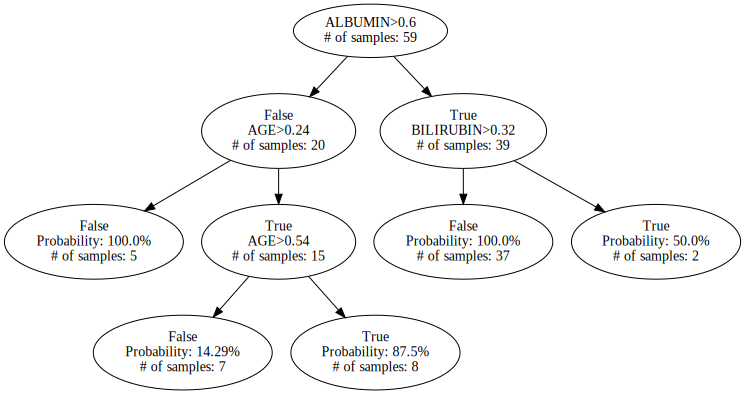

In [333]:
# Plot the tree to visualize the decision boundaries and the most importants features
node=tree1[0]
tree_plot = Node(node['feature'] + ">" + str(round(node['threshold'],2)) + '\n' + '# of samples: ' + str(len(node['sample_index'])))
list_tree=[tree_plot]

for node in tree1[1:]:
    if len(node['children'])!=0:
        label =  str(node['condition']) +'\n'+ node['feature'] + ">" + str(round(node['threshold'],2)) + '\n' + '# of samples: ' + str(len(node['sample_index']))
    else:
        label=  str(node['condition']) +'\n'+ 'Probability: ' + str(round(node['probability'][1]*100,2)) + '%' + '\n' + '# of samples: ' + str(len(node['sample_index']))

    list_tree.append(Node(label, parent=list_tree[node['parent']]))

DotExporter(tree_plot).to_dotfile("tree1_plot.dot")
with open("tree1_plot.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [334]:
# Save the tree as a .png file
render('dot', 'png', 'tree1_plot.dot')

'tree1_plot.dot.png'

Text(0, 0.5, 'Precision')

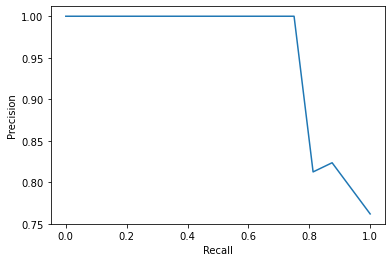

In [335]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y1_test, y1_prob)
plt.plot(recall_list,precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [336]:
# Compute the AUC associated to precision recall curve
PR_AUC(y1_test, y1_prob)

PR AUC:  0.9569


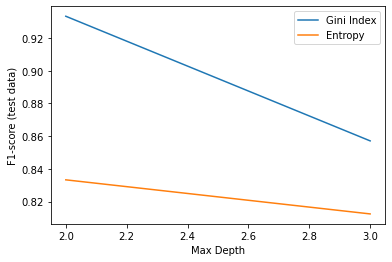

In [337]:
# Plot the accuracy for different depth values and for the two cost functions
f1_1_gini=[]
f1_1_entropy=[]
max_depth=3

for depth in range(2,max_depth+1):
    dt_gini = DecisionTree(depth, cost_fn=gini_index, min_sample=2)
    y1_prob_gini = np.array([k for k in dt_gini.predict (dt_gini.fit (x1_train, y1_train)[0], x1_test)])
    y1_pred_gini = y1_prob_gini[:,1] > 0.5
    f1_1_gini.append(F1(y1_test, y1_pred_gini))

    dt_entropy = DecisionTree(depth, cost_fn=entropy, min_sample=2)
    y1_prob_entropy = np.array([k for k in dt_entropy.predict (dt_entropy.fit (x1_train, y1_train)[0], x1_test)])
    y1_pred_entropy = y1_prob_entropy[:,1] > 0.5
    f1_1_entropy.append(F1(y1_test, y1_pred_entropy))
    
plt.plot([d for d in range(2, max_depth+1)],f1_1_gini, label='Gini Index')
plt.plot([d for d in range(2, max_depth+1)],f1_1_entropy, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('F1-score (test data)')
plt.legend(loc="upper right")

# Test the DT on the dataset 2

For the gini index cost function :
The best depth value is :  3
For the entropy cost function :
The best depth value is :  3


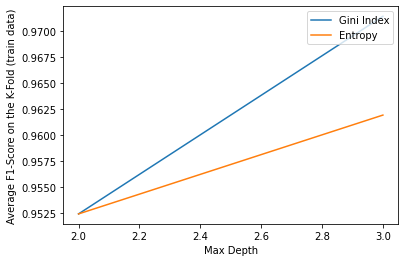

In [338]:
# Perform a 5-fold validation to find the best depth value
max_depth = 3
print('For the gini index cost function :')
f1_avg2_gini = KFiveFold_DT(x2_train, y2_train, max_depth, cost_fn=gini_index)
print('For the entropy cost function :')
f1_avg2_entropy = KFiveFold_DT(x2_train, y2_train, max_depth, cost_fn=entropy)
plt.plot([d for d in range(2, max_depth +1)],f1_avg2_gini, label='Gini Index')
plt.plot([d for d in range(2, max_depth +1)],f1_avg2_entropy, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Average F1-Score on the K-Fold (train data)')
plt.legend(loc="upper right")

In [339]:
# Perform the test prediction using the best depth
dt2=DecisionTree(max_depth=3, cost_fn=entropy, min_sample=2)
tree2 = dt2.fit (x2_train, y2_train)[0]
y2_prob = np.array([i for i in dt2.predict (tree2, x2_test)])
y2_pred = y2_prob[:,1] > 0.5

In [340]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y2_test, y2_pred)

Accuracy: 64.93%
Confusion Matrix : [[88, 38], [63, 99]]
Recall : 0.58
Precision : 0.7
F1 Score : 0.64


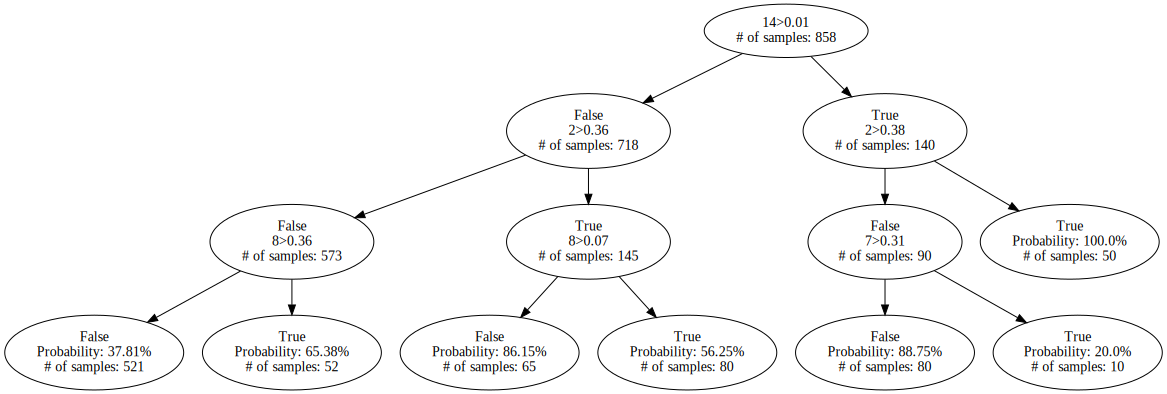

In [341]:
# Plot the tree to visualize the decision boundaries and the most importants features
node=tree2[0]
tree_plot = Node(str(node['feature']) + ">" + str(round(node['threshold'],2)) + '\n' + '# of samples: ' + str(len(node['sample_index'])))
list_tree=[tree_plot]

for node in tree2[1:]:
    if len(node['children'])!=0:
        label =  str(node['condition']) +'\n'+ str(node['feature']) + ">" + str(round(node['threshold'],2)) + '\n' + '# of samples: ' + str(len(node['sample_index']))
    else:
        label=  str(node['condition']) +'\n'+ 'Probability: ' + str(round(node['probability'][1]*100,2)) + '%' + '\n' + '# of samples: ' + str(len(node['sample_index']))
  
    list_tree.append(Node(label, parent=list_tree[node['parent']]))

DotExporter(tree_plot).to_dotfile("tree2_plot.dot")
with open("tree2_plot.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [342]:
# Save the tree as a .png file
render('dot', 'png', 'tree2_plot.dot')

'tree2_plot.dot.png'

Text(0, 0.5, 'Precision')

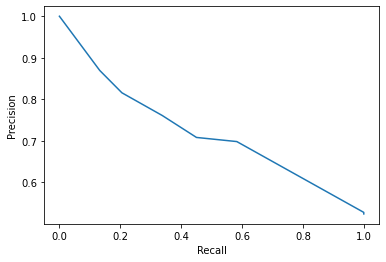

In [343]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y2_test, y2_prob)
plt.plot(recall_list,precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [344]:
# Compute the AUC associated to precision recall curve
PR_AUC(y2_test, y2_prob)

PR AUC:  0.7206


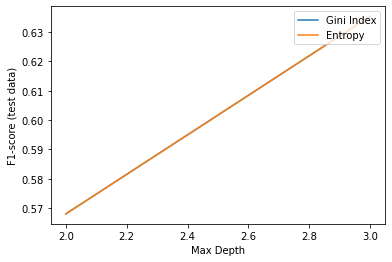

In [345]:
# Plot the accuracy for different depth values and for the two cost functions
f1_2_gini = []
f1_2_entropy = []
max_depth = 3

for depth in range(2,max_depth + 1):
    dt_gini = DecisionTree(depth, cost_fn=gini_index, min_sample=2)
    y2_prob_gini = np.array([k for k in dt_gini.predict (dt_gini.fit (x2_train, y2_train)[0], x2_test)])
    y2_pred_gini = y2_prob_gini[:,1] > 0.5
    f1_2_gini.append(F1(y2_test, y2_pred_gini))
    dt_entropy = DecisionTree(depth, cost_fn=entropy, min_sample=2)
    y2_prob_entropy = np.array([k for k in dt_entropy.predict (dt_entropy.fit (x2_train, y2_train)[0], x2_test)])
    y2_pred_entropy = y2_prob_entropy[:,1] > 0.5
    f1_2_entropy.append(F1(y2_test, y2_pred_entropy))
    
plt.plot([d for d in range(2, max_depth+1)],f1_2_gini, label='Gini Index')
plt.plot([d for d in range(2, max_depth+1)],f1_2_entropy, label='Entropy')
plt.xlabel('Max Depth')
plt.ylabel('F1-score (test data)')
plt.legend(loc="upper right")

# Dimension reduction for the KNN

# Dataset 1

In [346]:
# Perform a PCA to reduce the dimension of the input dataset
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])
principalDf1

,principal component 1,principal component 2
0,-1.028967,0.514220
1,-0.769676,-0.666103
2,-0.039227,-0.181980
3,-0.472114,-0.364131
4,-0.378222,-0.009206
...,...,...
75,-0.790957,0.473689
76,0.990478,0.166318
77,-0.103625,0.143652
78,0.752584,0.702533


In [347]:
# Create a test and train split
train_pct1 = 0.75
cut_index_1 = int(principalDf1.shape[0]*train_pct1)-1
x1pca_train, y1_train = principalDf1.iloc[rand_index1[:cut_index_1]], y1.iloc[rand_index1[:cut_index_1]]
x1pca_test, y1_test = principalDf1.iloc[rand_index1[cut_index_1:]], y1.iloc[rand_index1[cut_index_1:]]

In [348]:
# Predict the test values using PCA1 and PCA2
myK1 = 9
model1 = KNN(K=myK1)
y1pca_prob, knns = model1.fit(x1pca_train.to_numpy(), y1_train.to_numpy()).predict(x1pca_test.to_numpy())
y1pca_pred = y1pca_prob[:,1] > 0.5

In [349]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y1_test, y1pca_pred)

Accuracy: 71.43%
Confusion Matrix : [[15, 5], [1, 0]]
Recall : 0.94
Precision : 0.75
F1 Score : 0.83


Text(0, 0.5, 'Precision')

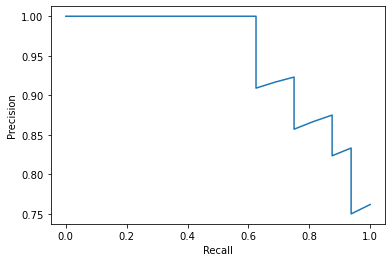

In [350]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y1_test, y1pca_prob)
plt.plot(recall_list,precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [351]:
# Compute the AUC associated to precision recall curve
PR_AUC(y1_test, y1pca_prob)

PR AUC:  0.9499


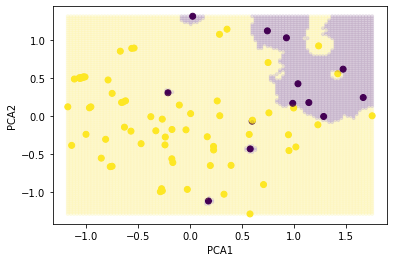

In [352]:
# Plot the decision boundaries with PCA1 and PCA2
max_x1, min_x1 = max(principalDf1.to_numpy()[:,0]),min(principalDf1.to_numpy()[:,0])
max_y1, min_y1 = max(principalDf1.to_numpy()[:,1]),min(principalDf1.to_numpy()[:,1])
x1_grid = np.linspace(min_x1, max_x1,100)
y1_grid = np.linspace(min_y1, max_y1,100)
x1pca1, x1pca2 = np.meshgrid(x1_grid, y1_grid)
x1_all = np.vstack((x1pca1.ravel(),x1pca2.ravel())).T
df_x1_all = pd.DataFrame(x1_all,columns=['PCA1','PCA2'])

myK1 = 9
model1 = KNN(K=myK1)
y1_all_prob, knns = model1.fit(principalDf1.to_numpy(), y1.to_numpy()).predict(df_x1_all.to_numpy())
y1_all_pred = y1_all_prob[:,1] > 0.5

plt.scatter(principalDf1.to_numpy()[:,0], principalDf1.to_numpy()[:,1], c=y1, marker='o', alpha=1)
plt.scatter(df_x1_all.to_numpy()[:,0], df_x1_all.to_numpy()[:,1], c=y1_all_pred, marker='.', alpha=.1)
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.show()

# Dataset 2

In [353]:
# Perform a PCA to reduce the dimension of the input dataset
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])
principalDf2

,principal component 1,principal component 2
0,-0.655806,0.229154
1,0.079970,-0.421071
2,0.537991,0.125615
3,0.480117,0.041510
4,0.393554,-0.094284
...,...,...
1141,0.287424,-0.230241
1142,0.465847,0.029308
1143,0.440743,-0.144517
1144,-0.604417,0.292805


In [354]:
# Create a test and train split
train_pct2 = 0.75
cut_index_1 = int(principalDf2.shape[0]*train_pct2)-1
x2pca_train, y2_train = principalDf2.iloc[rand_index2[:cut_index_1]], y2.iloc[rand_index2[:cut_index_1]]
x2pca_test, y2_test = principalDf2.iloc[rand_index2[cut_index_1:]], y2.iloc[rand_index2[cut_index_1:]]

In [355]:
# Predict the test values using PCA1 and PCA2
myK2 = 7
model2 = KNN(K=myK2)
y2pca_prob, knns = model2.fit(x2pca_train.to_numpy(), y2_train.to_numpy()).predict(x2pca_test.to_numpy())
y2pca_pred = y2pca_prob[:,1] > 0.5

In [356]:
# Plot the accuracy, confusion matrix, precision, recall and F1-score
metrics(y2_test, y2pca_pred)

Accuracy: 55.9%
Confusion Matrix : [[90, 66], [61, 71]]
Recall : 0.6
Precision : 0.58
F1 Score : 0.59


Text(0, 0.5, 'Precision')

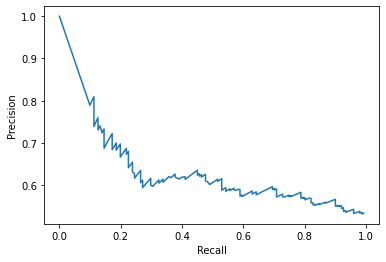

In [357]:
# Plot the precision recall curve
recall_list, precision_list = PR_curve(y2_test, y2pca_prob)
plt.plot(recall_list,precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [358]:
# Compute the AUC associated to precision recall curve
PR_AUC(y2_test, y2pca_prob)

PR AUC:  0.6304


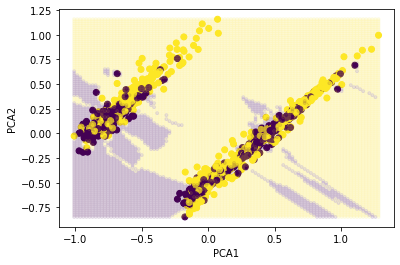

In [359]:
# Plot the decision boundaries with PCA1 and PCA2
max_x2, min_x2 = max(principalDf2.to_numpy()[:,0]),min(principalDf2.to_numpy()[:,0])
max_y2, min_y2 = max(principalDf2.to_numpy()[:,1]),min(principalDf2.to_numpy()[:,1])
x2_grid = np.linspace(min_x2, max_x2,100)
y2_grid = np.linspace(min_y2, max_y2,100)
x2pca1, x2pca2 = np.meshgrid(x2_grid, y2_grid)
x2_all = np.vstack((x2pca1.ravel(),x2pca2.ravel())).T
df_x2_all = pd.DataFrame(x2_all,columns=['PCA1','PCA2'])
myK2 = 7
model2 = KNN(K=myK2)
y2_all_prob, knns = model2.fit(principalDf2.to_numpy(), y2.to_numpy()).predict(df_x2_all.to_numpy())
y2_all_pred = y2_all_prob[:,1] > 0.5
plt.scatter(principalDf2.to_numpy()[:,0], principalDf2.to_numpy()[:,1], c=y2, marker='o', alpha=1)
plt.scatter(df_x2_all.to_numpy()[:,0], df_x2_all.to_numpy()[:,1], c=y2_all_pred, marker='.', alpha=.1)
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.show()